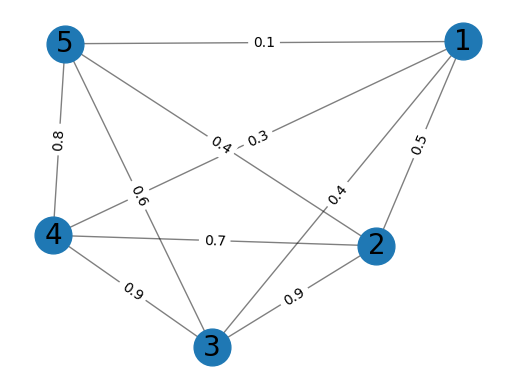

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

num_nodes = 5

G = nx.complete_graph(num_nodes)
mapping = {i: i + 1 for i in G.nodes()}
G = nx.relabel_nodes(G, mapping)

# Define distances (dissimilarities) between nodes
dis = np.array([[1.        , 0.50770483, 0.42401282, 0.32431256, 0.12745041],
       [0.50770483, 1.        , 0.88838996, 0.66428139, 0.38490286],
       [0.42401282, 0.88838996, 1.        , 0.8880586 , 0.60249459],
       [0.32431256, 0.66428139, 0.8880586 , 1.        , 0.81083959],
       [0.12745041, 0.38490286, 0.60249459, 0.81083959, 1.        ]])
# dis = 1-dis
dis = np.round(dis, 1)

rows, cols = dis.shape

for i in range(rows):
    for j in range(i+1, cols):
        G.edges[i+1,j+1]['weight'] = dis[i,j]    
 
pos = nx.spring_layout(G,weight='weight', seed=42)
# pos = nx.bfs_layout(G, start=1)
# pos = nx.kamada_kawai_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.spiral_layout(G)
# pos = nx.spectral_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=700)


nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')

plt.savefig('E:/FPP_files_and_codes/spring_embeding.png', dpi=600, bbox_inches='tight')
plt.show()


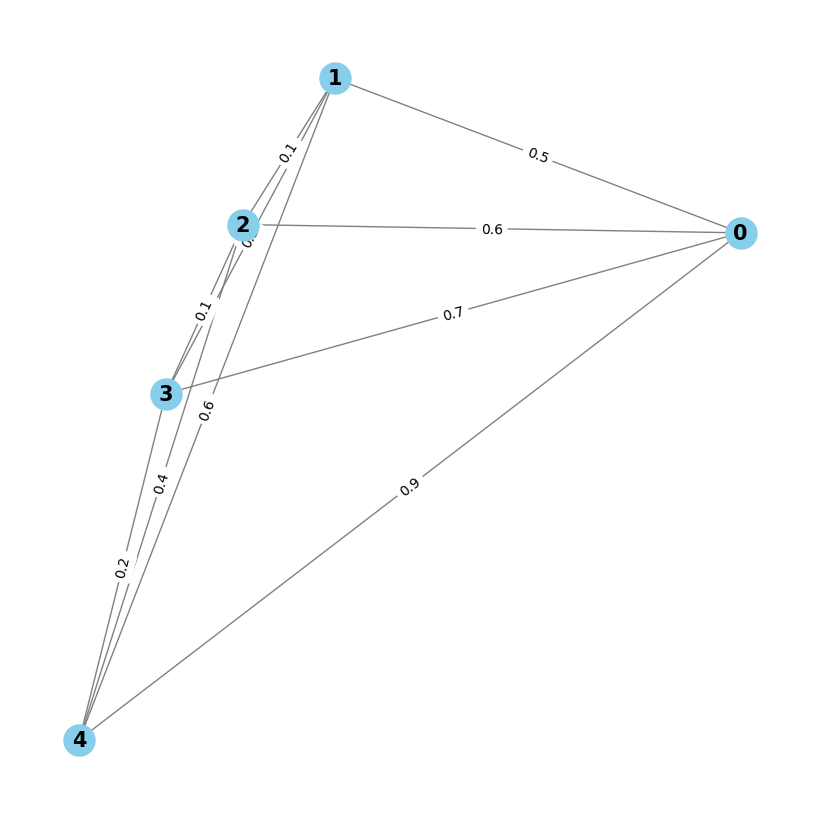

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import networkx as nx

weights = dis

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
pos = mds.fit_transform(weights)

# Create the graph
G = nx.Graph()
for i in range(len(weights)):
    for j in range(i + 1, len(weights)):
        G.add_edge(i, j, weight=weights[i, j])

# Plot the graph
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=15, font_weight='bold', edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


In [24]:
pos

array([[ 0.52108706,  0.06961175],
       [ 0.02697858,  0.17601258],
       [-0.08505365,  0.07531092],
       [-0.17892986, -0.04134808],
       [-0.28408213, -0.27958717]])

In [26]:
weights

array([[0. , 0.5, 0.6, 0.7, 0.9],
       [0.5, 0. , 0.1, 0.3, 0.6],
       [0.6, 0.1, 0. , 0.1, 0.4],
       [0.7, 0.3, 0.1, 0. , 0.2],
       [0.9, 0.6, 0.4, 0.2, 0. ]])